In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import os


In [25]:
X_train= pd.read_csv('X_train.csv',index_col =None)
y_train = pd.read_csv('y_train.csv',index_col =None)

X_val = pd.read_csv('X_val.csv',index_col =None)
y_val = pd.read_csv('y_val.csv',index_col =None)

df_test= pd.read_csv('df_test.csv',index_col =None)



In [26]:
X_val

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,new_user,Top_tier_cities,Age_Bracket,AgeBin
0,C1,631,Owned,Individual,No,X2,14.0,4.0,22,21352,0,1,0,5
1,C19,1947,Owned,Individual,No,X3,1.0,1.0,2,11280,0,0,0,4
2,C8,350,Owned,Individual,No,X,14.0,1.0,22,14400,0,1,0,5
3,C1,1159,Rented,Individual,No,X6,14.0,4.0,21,13040,0,1,0,2
4,C28,3716,Rented,Individual,No,X0,0.0,0.0,15,8722,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12716,C1,2535,Owned,Joint,Yes,X3,14.0,5.0,18,21696,0,1,4,4
12717,C2,3241,Rented,Individual,No,X2,14.0,5.0,22,14498,0,1,0,4
12718,C1,5258,Owned,Individual,No,X1,14.0,1.0,19,17080,0,1,0,5
12719,C4,4117,Owned,Individual,No,X4,13.0,3.0,18,13772,0,1,0,4


In [4]:
# X_train['Holding_Policy_Duration']=X_train['Holding_Policy_Duration'].fillna(999)
# X_train['Holding_Policy_Type']=X_train['Holding_Policy_Type'].fillna(999)
# X_train['Health Indicator']= X_train['Health Indicator'].fillna(0)

# X_val['Holding_Policy_Duration']=X_val['Holding_Policy_Duration'].fillna(999)
# X_val['Holding_Policy_Type']=X_val['Holding_Policy_Type'].fillna(999)
# X_val['Health Indicator']= X_val['Health Indicator'].fillna(0)

# df_test['Holding_Policy_Duration']=df_test['Holding_Policy_Duration'].fillna(999)
# df_test['Holding_Policy_Type']=df_test['Holding_Policy_Type'].fillna(999)
# df_test['Health Indicator']= df_test['Health Indicator'].fillna(0)

In [27]:
X_train['Holding_Policy_Duration'] = np.int64(X_train['Holding_Policy_Duration'])
X_train['Holding_Policy_Type'] = np.int64(X_train['Holding_Policy_Type'])

In [28]:
X_val['Holding_Policy_Duration'] = np.int64(X_val['Holding_Policy_Duration'])
X_val['Holding_Policy_Type'] = np.int64(X_val['Holding_Policy_Type'])

In [29]:
df_test['Holding_Policy_Duration'] = np.int64(df_test['Holding_Policy_Duration'])
df_test['Holding_Policy_Type'] = np.int64(df_test['Holding_Policy_Type'])

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38161 entries, 0 to 38160
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   City_Code                38161 non-null  object
 1   Region_Code              38161 non-null  int64 
 2   Accomodation_Type        38161 non-null  object
 3   Reco_Insurance_Type      38161 non-null  object
 4   Is_Spouse                38161 non-null  object
 5   Health Indicator         38161 non-null  object
 6   Holding_Policy_Duration  38161 non-null  int64 
 7   Holding_Policy_Type      38161 non-null  int64 
 8   Reco_Policy_Cat          38161 non-null  int64 
 9   Reco_Policy_Premium      38161 non-null  int64 
 10  new_user                 38161 non-null  int64 
 11  Top_tier_cities          38161 non-null  int64 
 12  Age_Bracket              38161 non-null  int64 
 13  AgeBin                   38161 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 4

In [31]:
#defining catagorical columns and numerical columns
cat_cols = ['City_Code',  'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator','Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat','Top_tier_cities','new_user','AgeBin']
num_cols = ['Region_Code','Age_Bracket','Reco_Policy_Premium']

X_train[cat_cols] = X_train[cat_cols].apply(lambda x: x.astype('category'))
X_train[num_cols] = X_train[num_cols].apply(lambda x: x.astype('int'))

In [32]:
#defining catagorical columns and numerical columns
cat_cols = ['City_Code',  'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator','Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat','Top_tier_cities','new_user','AgeBin']
num_cols = ['Region_Code','Age_Bracket','Reco_Policy_Premium']

X_val[cat_cols] = X_val[cat_cols].apply(lambda x: x.astype('category'))
X_val[num_cols] = X_val[num_cols].apply(lambda x: x.astype('int'))

In [33]:
#defining catagorical columns and numerical columns
cat_cols = ['City_Code',  'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator','Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat','Top_tier_cities','new_user','AgeBin']
num_cols = ['Region_Code','Age_Bracket','Reco_Policy_Premium']

df_test[cat_cols] = df_test[cat_cols].apply(lambda x: x.astype('category'))
df_test[num_cols] = df_test[num_cols].apply(lambda x: x.astype('int'))

In [37]:
# y_train['Response'] = y_train['Response'].apply(lambda x: x.astype('category'))
# y_val['Response'] = y_val['Response'].apply(lambda x: x.astype('category'))


0        0
1        0
2        0
3        0
4        1
        ..
38156    0
38157    0
38158    0
38159    0
38160    0
Name: Response, Length: 38161, dtype: int64

In [12]:
X_train.sample(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Age_Bracket,Top_tier_cities,new_users,AgeBin
13664,28444,C33,1179,Rented,Individual,No,X2,999,999,22,10248,0,0,1,1
12549,3594,C3,2232,Owned,Individual,No,X5,9,4,18,16172,0,1,0,5
22746,45589,C26,1076,Rented,Individual,No,0,6,3,17,5064,0,0,0,1
18253,47889,C8,5221,Owned,Individual,No,X3,999,999,13,10386,0,1,1,2
33389,21398,C25,2389,Rented,Individual,No,X1,999,999,15,3540,0,0,1,1
23977,50577,C2,3013,Owned,Individual,No,X1,999,999,21,14520,0,1,1,5
27629,31048,C12,3637,Owned,Individual,No,X1,9,3,18,6230,0,0,0,2
23656,34800,C1,1065,Owned,Individual,No,X2,4,3,18,22176,0,1,0,5
13721,23129,C5,514,Owned,Individual,No,0,1,2,20,9604,0,1,0,2
29703,25261,C12,115,Rented,Individual,No,X1,999,999,19,13420,0,0,1,3


In [38]:
catcols = ['City_Code',  'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator','Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat','Top_tier_cities','new_user','AgeBin']


In [39]:
# X_train.drop(columns = 'ID', axis=1, inplace=True)
# X_val.drop(columns = 'ID', axis=1, inplace=True)
# df_test.drop(columns = 'ID', axis=1, inplace=True)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38161 entries, 0 to 38160
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City_Code                38161 non-null  category
 1   Region_Code              38161 non-null  int32   
 2   Accomodation_Type        38161 non-null  category
 3   Reco_Insurance_Type      38161 non-null  category
 4   Is_Spouse                38161 non-null  category
 5   Health Indicator         38161 non-null  category
 6   Holding_Policy_Duration  38161 non-null  category
 7   Holding_Policy_Type      38161 non-null  category
 8   Reco_Policy_Cat          38161 non-null  category
 9   Reco_Policy_Premium      38161 non-null  int32   
 10  new_user                 38161 non-null  category
 11  Top_tier_cities          38161 non-null  category
 12  Age_Bracket              38161 non-null  int32   
 13  AgeBin                   38161 non-null  category
dtypes: cat

In [41]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
model=CatBoostClassifier()

In [126]:
# model.fit(X_train,y_train,cat_features=cat_cols)

In [50]:
prediction=model.predict(X_val)
prediction.min()

In [52]:
predictions=[]
for i in prediction:
    if i<0:
        predictions.append(0)
    else:
        predictions.append(i)
        

In [53]:
predictions=np.array(predictions)

auc_lr1 =  roc_auc_score(y_val,predictions)
auc_lr1

In [63]:
test_prediction=model.predict(df_test)

In [64]:
test_predictions=[]
for i in test_prediction:
    if i<0:
        test_predictions.append(0)
    else:
        test_predictions.append(i)

In [72]:
test_predictions=np.array(test_predictions)

In [73]:
test_predictions.min(), test_predictions.max()

(0.0, 0.9368538314053848)

In [74]:
test_submit1=[]
for i in test_predictions:
    if i<0.5:
        test_submit1.append(0)
    else:
        test_submit1.append(1)

In [76]:
test_submit1=np.array(test_submit1)
test_submit1.shape

(21805,)

In [133]:
df_submit = pd.read_csv('sample_submission.csv',index_col = None)

In [134]:
df_submit.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [82]:
dict={'ID':df_submit["ID"],'Response':test_submit1}
df_submit=pd.DataFrame(dict)
df_submit.to_csv('catboost1.csv',index=False)

In [88]:
df_submit['Response'].value_counts()

0    19155
1     2650
Name: Response, dtype: int64

## hypertuning


In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
parameter_grid = {
          'max_depth':[3,1,2,5,7,9,10],
          'iterations':[500,750,1000,1500],
          'learning_rate':[0.001,0.05,0.03,0.01,0.1,0.3], 
          'l2_leaf_reg':[0,3,1,5,10,100],
          'bagging_temperature':[0,1],
          'random_strength':[0,1,3,5]
          }

In [44]:
model1=CatBoostClassifier(cat_features=cat_cols)

In [45]:
randomsearch=RandomizedSearchCV(model1,param_distributions=parameter_grid,verbose=2,n_iter=3,cv=3)

In [46]:
randomsearch.fit(X_train, y_train)

maining: 1m
620:	learn: 0.4821438	total: 1m 38s	remaining: 1m
621:	learn: 0.4820884	total: 1m 38s	remaining: 59.9s
622:	learn: 0.4820337	total: 1m 38s	remaining: 59.7s
623:	learn: 0.4820064	total: 1m 38s	remaining: 59.6s
624:	learn: 0.4819977	total: 1m 39s	remaining: 59.4s
625:	learn: 0.4819325	total: 1m 39s	remaining: 59.3s
626:	learn: 0.4819073	total: 1m 39s	remaining: 59.1s
627:	learn: 0.4818724	total: 1m 39s	remaining: 58.9s
628:	learn: 0.4818518	total: 1m 39s	remaining: 58.8s
629:	learn: 0.4818194	total: 1m 39s	remaining: 58.6s
630:	learn: 0.4817752	total: 1m 40s	remaining: 58.5s
631:	learn: 0.4817055	total: 1m 40s	remaining: 58.3s
632:	learn: 0.4816531	total: 1m 40s	remaining: 58.2s
633:	learn: 0.4816318	total: 1m 40s	remaining: 58s
634:	learn: 0.4815388	total: 1m 40s	remaining: 57.9s
635:	learn: 0.4814495	total: 1m 40s	remaining: 57.7s
636:	learn: 0.4814345	total: 1m 40s	remaining: 57.5s
637:	learn: 0.4813968	total: 1m 41s	remaining: 57.4s
638:	learn: 0.4813573	total: 1m 41s	rem

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001BF01F72730>,
                   n_iter=3,
                   param_distributions={'bagging_temperature': [0, 1],
                                        'iterations': [500, 750, 1000, 1500],
                                        'l2_leaf_reg': [0, 3, 1, 5, 10, 100],
                                        'learning_rate': [0.001, 0.05, 0.03,
                                                          0.01, 0.1, 0.3],
                                        'max_depth': [3, 1, 2, 5, 7, 9, 10],
                                        'random_strength': [0, 1, 3, 5]},
                   verbose=2)

In [47]:
randomsearch.best_params_

{'random_strength': 0,
 'max_depth': 7,
 'learning_rate': 0.03,
 'l2_leaf_reg': 5,
 'iterations': 1000,
 'bagging_temperature': 0}

In [48]:
model2=CatBoostClassifier(random_strength=0,
  max_depth=7,
  learning_rate= 0.03,
  l2_leaf_reg= 5,
  iterations= 1200,
  bagging_temperature=0)

In [49]:
model2.fit(X_train,y_train,cat_features=cat_cols)

3:	learn: 0.4737115	total: 2m 14s	remaining: 1m 1s
824:	learn: 0.4736915	total: 2m 14s	remaining: 1m 1s
825:	learn: 0.4736667	total: 2m 15s	remaining: 1m 1s
826:	learn: 0.4736413	total: 2m 15s	remaining: 1m 1s
827:	learn: 0.4735943	total: 2m 15s	remaining: 1m
828:	learn: 0.4734767	total: 2m 16s	remaining: 1m
829:	learn: 0.4733878	total: 2m 16s	remaining: 1m
830:	learn: 0.4733691	total: 2m 16s	remaining: 1m
831:	learn: 0.4733469	total: 2m 16s	remaining: 1m
832:	learn: 0.4733123	total: 2m 17s	remaining: 1m
833:	learn: 0.4732698	total: 2m 17s	remaining: 1m
834:	learn: 0.4732019	total: 2m 17s	remaining: 1m
835:	learn: 0.4731876	total: 2m 17s	remaining: 59.9s
836:	learn: 0.4731511	total: 2m 17s	remaining: 59.7s
837:	learn: 0.4731145	total: 2m 17s	remaining: 59.6s
838:	learn: 0.4730786	total: 2m 18s	remaining: 59.4s
839:	learn: 0.4730322	total: 2m 18s	remaining: 59.2s
840:	learn: 0.4729873	total: 2m 18s	remaining: 59s
841:	learn: 0.4729714	total: 2m 18s	remaining: 58.9s
842:	learn: 0.4729490

In [50]:
prediction1=model2.predict(X_train)

In [52]:
prediction1 = np.array(prediction1)

In [145]:
hpredictions=[]
for i in prediction1:
    if i<0:
        hpredictions.append(0)
    else:
        hpredictions.append(i)

In [146]:
hpredictions=np.array(hpredictions)

In [53]:
auc_lr1h =  roc_auc_score(y_train,prediction1)
auc_lr1h

0.5411483707065905

In [61]:
prediction1=model2.predict(X_val)

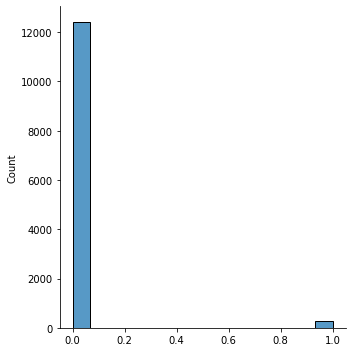

In [63]:
sns.displot(prediction1)

In [149]:
hvpredictions=[]
for i in prediction1:
    if i<0:
        hvpredictions.append(0)
    else:
        hvpredictions.append(i)

In [150]:
hvpredictions=np.array(hvpredictions)

In [23]:
auc_lr1h =  roc_auc_score(y_val,prediction1)
auc_lr1h

0.6032795995874688

In [60]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[9491 2934]
 [ 132  164]]


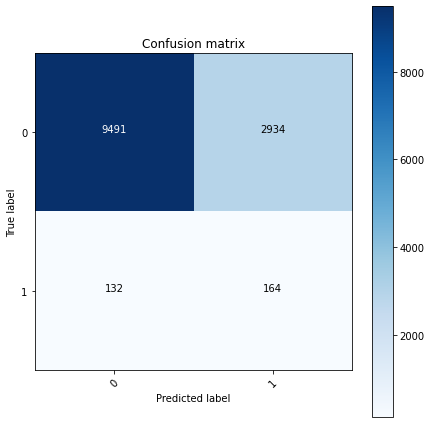

In [62]:
# y_hat_test = lr.predict(X_val_encoded)
cnf_matrix = confusion_matrix(prediction1, y_val)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [54]:
tsprediction1=model2.predict(df_test)

In [55]:
tsprediction1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
tspredictions=[]
for i in tsprediction1:
    if i<0:
        tspredictions.append(0)
    else:
        tspredictions.append(i)

In [58]:
tspredictions=np.array(tspredictions)

<AxesSubplot:ylabel='Density'>

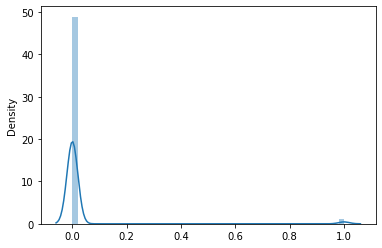

In [59]:
sns.distplot(tspredictions)

In [156]:
test_submit2=[]
for i in tspredictions:
    if i<0.5:
        test_submit2.append(0)
    else:
        test_submit2.append(1)

In [157]:
test_submit2=np.array(test_submit2)
test_submit2.shape

(21805,)

In [159]:
dict={'ID':df_submit["ID"],'Response':test_submit2}
df_submit=pd.DataFrame(dict)
df_submit.to_csv('catboost4.csv',index=False)

In [168]:
shap_values = model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features_indices), 
                                                                     type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X_test.iloc[3,:])

NameError: name 'Pool' is not defined